# TED Talks Exploratory Data Analysis

## Import data and libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
from ast import literal_eval
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [75]:
#read in summarized ted talk data
ted_main_df = pd.read_csv('data/ted_main.csv')

In [76]:
pd.set_option('display.max_columns', None)
ted_main_df.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1151367060   
2                  David Pogue: Simplicity sells            1      1151367060   
3             Majora Carter: Greening the ghetto            1      1151367060   
4  Hans Rosling: The best stats you've ever seen            1      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520  
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292  
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550  
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869

Initial thoughts on what I can analyze
- is there a correlation between the number of languages and the number of views/comments/ratings?
- how correlated are views, comments and ratings? for example, are more viewed talks more commented on or more highly rated on average?
- how many events are in my dataset?
- how evenly distributed are my tags? is there a connection between the tags assigned and how popular a talk is?
- what information can I glean from the "ratings" column? it looks like there are some sentiments embedded in there

In [77]:
ted_main_df.describe()

comments     duration     film_date    languages  num_speaker  \
count  2550.000000  2550.000000  2.550000e+03  2550.000000  2550.000000   
mean    191.562353   826.510196  1.321928e+09    27.326275     1.028235   
std     282.315223   374.009138  1.197391e+08     9.563452     0.207705   
min       2.000000   135.000000  7.464960e+07     0.000000     1.000000   
25%      63.000000   577.000000  1.257466e+09    23.000000     1.000000   
50%     118.000000   848.000000  1.333238e+09    28.000000     1.000000   
75%     221.750000  1046.750000  1.412964e+09    33.000000     1.000000   
max    6404.000000  5256.000000  1.503792e+09    72.000000     5.000000   

       published_date         views  
count    2.550000e+03  2.550000e+03  
mean     1.343525e+09  1.698297e+06  
std      9.464009e+07  2.498479e+06  
min      1.151367e+09  5.044300e+04  
25%      1.268463e+09  7.557928e+05  
50%      1.340935e+09  1.124524e+06  
75%      1.423432e+09  1.700760e+06  
max      1.506092e+09  4.722711e+07

In [78]:
ted_main_df.isnull().any()

comments              False
description           False
duration              False
event                 False
film_date             False
languages             False
main_speaker          False
name                  False
num_speaker           False
published_date        False
ratings               False
related_talks         False
speaker_occupation     True
tags                  False
title                 False
url                   False
views                 False
dtype: bool

In [79]:
ted_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

## Clean and transform columns

Turn UNIX dates into datetime values

In [80]:
ted_main_df['film_datestamp'] = ted_main_df['film_date'].apply(datetime.fromtimestamp)
ted_main_df['published_datestamp'] = ted_main_df['published_date'].apply(datetime.fromtimestamp)
ted_main_df[['film_datestamp','published_datestamp']]

film_datestamp published_datestamp
0    2006-02-24 18:00:00 2006-06-26 19:11:00
1    2006-02-24 18:00:00 2006-06-26 19:11:00
2    2006-02-23 18:00:00 2006-06-26 19:11:00
3    2006-02-25 18:00:00 2006-06-26 19:11:00
4    2006-02-21 18:00:00 2006-06-27 15:38:00
...                  ...                 ...
2545 2017-06-05 19:00:00 2017-09-19 15:00:16
2546 2017-04-23 19:00:00 2017-09-20 10:02:17
2547 2017-04-23 19:00:00 2017-09-21 10:01:35
2548 2017-07-07 19:00:00 2017-09-21 15:00:42
2549 2017-04-23 19:00:00 2017-09-22 10:00:22

[2550 rows x 2 columns]

Fill missing values

In [87]:
ted_main_df[ted_main_df['speaker_occupation'].isnull()]

comments                                        description  duration  \
1113       145  After a crisis, how can we tell if water is sa...       217   
1192       122  The Pirate Party fights for transparency, anon...      1097   
1220       257  As you surf the Web, information is being coll...       399   
1656       140  In this lovely talk, TED Fellow Ryan Holladay ...       389   
1911        48  What do you do with an outdated encyclopedia i...       366   
1949        70  Photographer Boniface Mwangi wanted to protest...       440   

                      event   film_date  languages     main_speaker  \
1113         TEDGlobal 2011  1310601600         38    Sonaar Luthra   
1192           TEDxObserver  1331424000         10   Rick Falkvinge   
1220                TED2012  1330473600         32      Gary Kovacs   
1656  TED@BCG San Francisco  1383091200         33    Ryan Holladay   
1911          TEDYouth 2014  1415059200         34    Brian Dettmer   
1949         TEDGlobal 2014  1413763200         33  Boniface Mwangi   

                                                   name  num_speaker  \
1113               Sonaar Luthra: Meet the Water Canary            1   
1192                      Rick Falkvinge: I am a pirate            1   
1220          Gary Kovacs: Tracking our online trackers            1   
1656  Ryan Holladay: To hear this music you have to ...            1   
1911             Brian Dettmer: Old books reborn as art            1   
1949          Boniface Mwangi: The day I stood up alone            1   

      published_date                                            ratings  \
1113      1326731605  [{'id': 10, 'name': 'Inspiring', 'count': 73},...   
1192      1333289675  [{'id': 8, 'name': 'Informative', 'count': 156...   
1220      1336057219  [{'id': 23, 'name': 'Jaw-dropping', 'count': 9...   
1656      1389369735  [{'id': 1, 'name': 'Beautiful', 'count': 211},...   
1911      1423238442  [{'id': 1, 'name': 'Beautiful', 'count': 361},...   
1949      1427989423  [{'id': 3, 'name': 'Courageous', 'count': 614}...   

                                          related_talks speaker_occupation  \
1113  [{'id': 523, 'hero': 'https://pe.tedcdn.com/im...                NaN   
1192  [{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...                NaN   
1220  [{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...                NaN   
1656  [{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...                NaN   
1911  [{'id': 610, 'hero': 'https://pe.tedcdn.com/im...                NaN   
1949  [{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...                NaN   

                                                   tags  \
1113  [TED Fellows, design, global development, tech...   
1192  [Internet, TEDx, global issues, politics, tech...   
1220  [Internet, advertising, business, privacy, tec...   
1656    [TED Fellows, entertainment, music, technology]   
1911                 [TEDYouth, art, books, creativity]   
1949  [TED Fellows, activism, art, corruption, photo...   

                                                  title  \
1113                              Meet the Water Canary   
1192                                      I am a pirate   
1220                       Tracking our online trackers   
1656  To hear this music you have to be there. Liter...   
1911                            Old books reborn as art   
1949                           The day I stood up alone   

                                                    url    views  \
1113  https://www.ted.com/talks/sonaar_luthra_meet_t...   353749   
1192  https://www.ted.com/talks/rick_falkvinge_i_am_...   181010   
1220  https://www.ted.com/talks/gary_kovacs_tracking...  2098639   
1656  https://www.ted.com/talks/ryan_holladay_to_hea...  1284510   
1911  https://www.ted.com/talks/brian_dettmer_old_bo...  1159937   
1949  https://www.ted.com/talks/boniface_mwangi_boni...  1342431   

          film_datestamp published_datestamp  
1113 2011-07-13 19:00:00

It's possible I could Google these speakers and find out their occupations, but for now I will just fill with "Unknown".

In [91]:
ted_main_df['speaker_occupation'].fillna('Unknown', inplace = True)

Process embedded data types

In [81]:
ted_main_df['tags'] = ted_main_df['tags'].apply(literal_eval)

In [82]:
ted_main_df['ratings'] = ted_main_df['ratings'].apply(literal_eval)

In [84]:
rating_df = pd.DataFrame(ted_main_df['ratings'][0])
rating_df.head()

id        name  count
0   7       Funny  19645
1   1   Beautiful   4573
2   9   Ingenious   6073
3   3  Courageous   3253
4  11  Longwinded    387

## Explore correlations between features

In [93]:
ted_main_df.corr()

comments  duration  film_date  languages  num_speaker  \
comments        1.000000  0.140694  -0.133303   0.318284    -0.035489   
duration        0.140694  1.000000  -0.242941  -0.295681     0.022257   
film_date      -0.133303 -0.242941   1.000000  -0.061957     0.040227   
languages       0.318284 -0.295681  -0.061957   1.000000    -0.063100   
num_speaker    -0.035489  0.022257   0.040227  -0.063100     1.000000   
published_date -0.185936 -0.166324   0.902565  -0.171836     0.049240   
views           0.530939  0.048740   0.006447   0.377623    -0.026389   

                published_date     views  
comments             -0.185936  0.530939  
duration             -0.166324  0.048740  
film_date             0.902565  0.006447  
languages            -0.171836  0.377623  
num_speaker           0.049240 -0.026389  
published_date        1.000000 -0.017920  
views                -0.017920  1.000000

<AxesSubplot:>

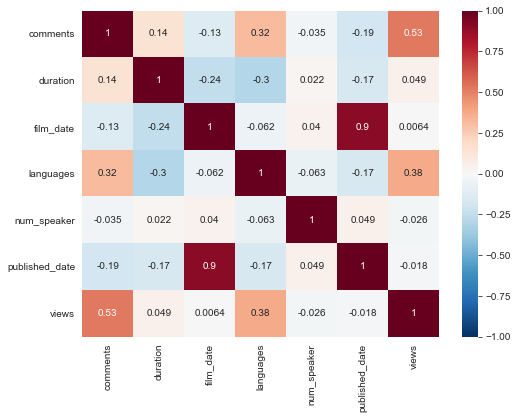

In [94]:
plt.figure(figsize = (8,6))
sns.heatmap(data = ted_main_df.corr(), annot = True, cmap = 'RdBu_r', vmin = -1, vmax = 1)

Correlation notes:

- Comments:
    - Minor positive correlation with **duration** (the longer a talk, the more likely it is to be commented on)
    - Minor negative correlation with **film date** (older talks have more comments, possibly because they've been available for commenting longer?)
    - Medium correlation with **languages** (talks with more comments are available in more languages)
    - Slight negative correlation with **published date** (see comments on correlation with film date)
    - Reasonably strong correlation with **views** (talks with more comments have been viewed more times)  
   
   
- Duration
    - Slight negative correlation with **film date** (talks have gotten shorter over time)
    - Slight negative correlation with **languages** (longer talks are available in fewer languages)
    - Minor negative correlation with **published date** (talks published more recently are a little shorter)  
   
   
- Film Date
    - Strong positive correlation with **published date** (talks are published around the same time they are filmed)   
   
   
- Languages:
    - Minor negative correlation with **published date** (talks published more recently are available in fewer languages, possibly because there's been less time to translate them)
    - Medium correlation with **views** (talks available in more languages have more views)   
   
   
- Num Speaker - no meaningful correlations
    - At least 75% of the records in the dataset have a num speaker = 1, so there's very little variability in this feature

## View feature distributions

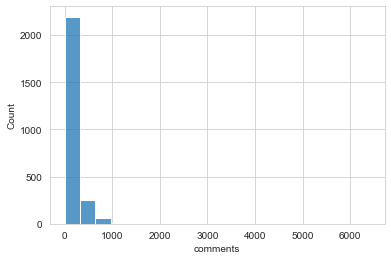

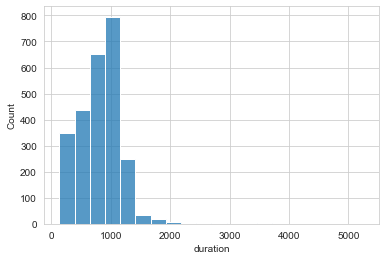

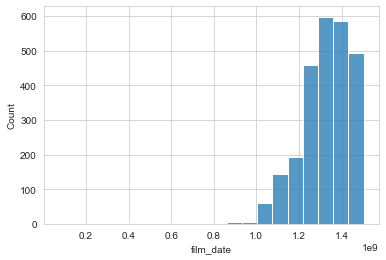

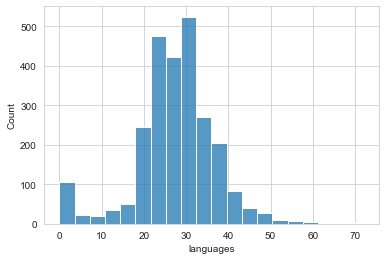

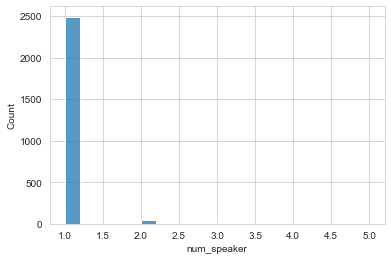

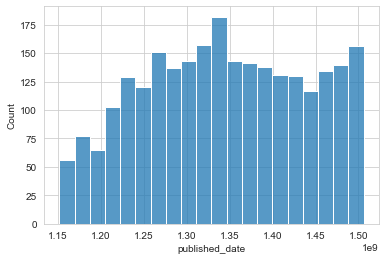

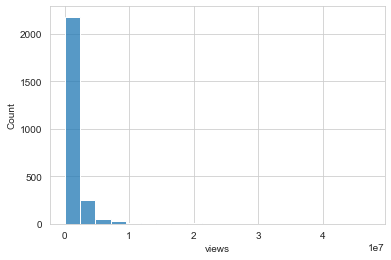

In [95]:
def plot_hist(features, df):
    
    for feature in features:
        sns.histplot(data = df[feature], bins = 20)
        plt.show()

feature_list = ['comments','duration','film_date','languages','num_speaker','published_date','views']

plot_hist(feature_list, ted_main_df)

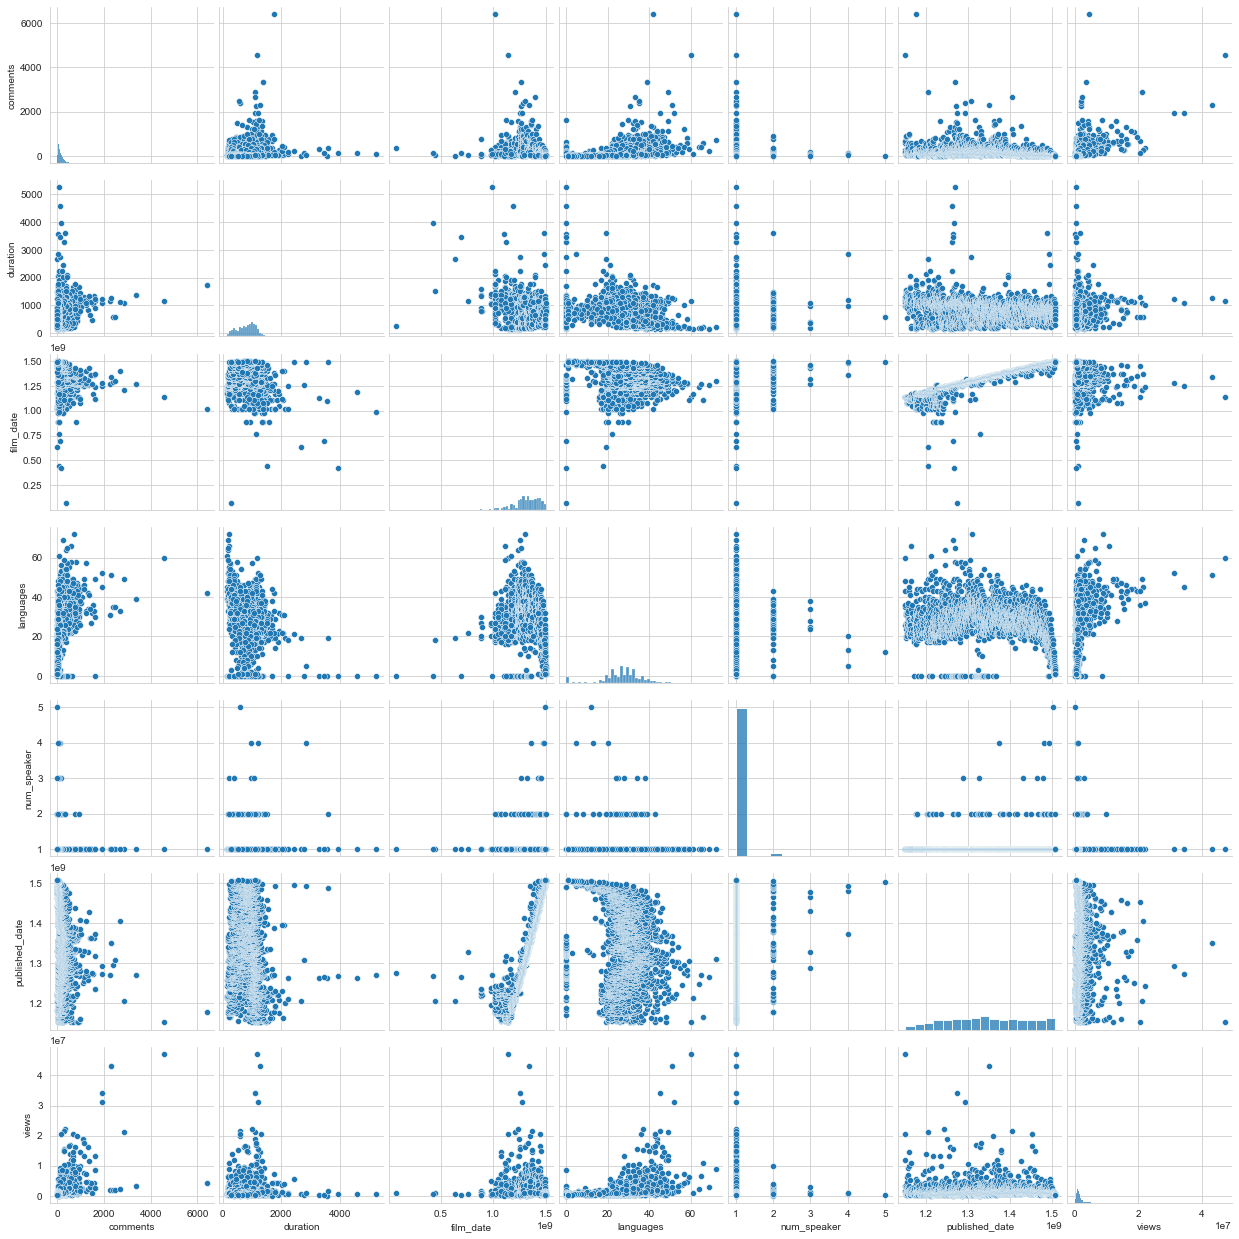

In [96]:
sns.pairplot(ted_main_df)

## Explore data

TED Talks by Year

<AxesSubplot:>

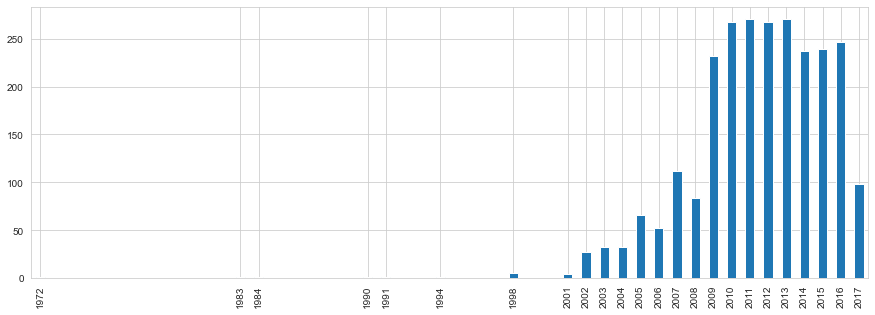

In [97]:
ted_main_df['film_datestamp'].dt.year.value_counts().sort_index()
ted_main_df['film_datestamp'].dt.year.value_counts().plot(kind = 'bar', figsize = (15,5))

Although the earliest talks in the dataset date back to 1972, they weren't recorded on a regular basis until around 2002.
There's a big jump in 2009, more than doubling the typical number of talks per year.
It looks like 2017 may not include the complete year.

## Tag analysis

Explode out the tags list so there is one row per tag per talk

In [98]:
#Create a series with one row per tag
s = ted_main_df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'tags'
s

0             children
0           creativity
0              culture
0                dance
0            education
             ...      
2549              play
2549     public spaces
2549           society
2549          software
2549    urban planning
Name: tags, Length: 19154, dtype: object

In [99]:
#Join the new series back to the original data
tags_df = ted_main_df.drop('tags', axis = 1).join(s)

#For ease of analysis, add a year column
tags_df['film_year'] = tags_df['film_datestamp'].dt.year

tags_df.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   

     event   film_date  languages  main_speaker  \
0  TED2006  1140825600         60  Ken Robinson   
0  TED2006  1140825600         60  Ken Robinson   
0  TED2006  1140825600         60  Ken Robinson   
0  TED2006  1140825600         60  Ken Robinson   
0  TED2006  1140825600         60  Ken Robinson   

                                        name  num_speaker  published_date  \
0  Ken Robinson: Do schools kill creativity?            1      1151367060   
0  Ken Robinson: Do schools kill creativity?            1      1151367060   
0  Ken Robinson: Do schools kill creativity?            1      1151367060   
0  Ken Robinson: Do schools kill creativity?            1      1151367060   
0  Ken Robinson: Do schools kill creativity?            1      1151367060   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   

                                       related_talks speaker_occupation  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...    Author/educator   
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...    Author/educator   
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...    Author/educator   
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...    Author/educator   
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...    Author/educator   

                         title  \
0  Do schools kill creativity?   
0  Do schools kill creativity?   
0  Do schools kill creativity?   
0  Do schools kill creativity?   
0  Do schools kill creativity?   

                                                 url     views  \
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110   
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110   
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110   
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110   
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110   

       film_datestamp published_datestamp        tags  film_year  
0 2006-02-24 18:00:00 2006-06-26 19:11:00    children       2006  
0 2006-02-24 18:00:00 2006-06-26 19:11:00  creativity       2006  
0 2006-02-24 18:00:00 2006-06-26 19:11:00     culture       2006  
0 2006-02-24 18:00:00 2006-06-26 19:11:00       dance       2006  
0 2006-02-24 18:00:00 2006-06-26 19:11:00   education       2006

Identify the 10 most commonly occurring tags

In [100]:
# Top 10 talk tags (topics), not counting TEDx, which I will remove next
tags_df['tags'].value_counts()[0:11]

technology       727
science          567
global issues    501
culture          486
TEDx             450
design           418
business         348
entertainment    299
health           236
innovation       229
society          224
Name: tags, dtype: int64

In [101]:
#store the top 10 topics (ignoring TEDx) in a list for charting
tag_list = list(tags_df['tags'].value_counts()[0:11].index)
tag_list.remove('TEDx')

<AxesSubplot:>

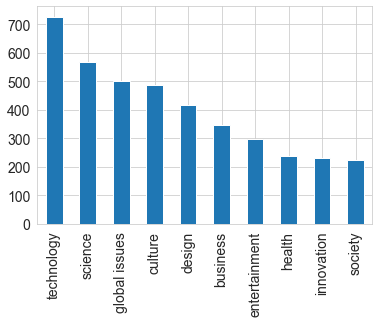

In [102]:
tags_df[tags_df['tags'].isin(tag_list)]['tags'].value_counts().plot(kind = 'bar', fontsize = 14)

In [103]:
#Sample of talks with top tags
tags_df[tags_df['tags'].isin(tag_list)]

comments                                        description  duration  \
0         4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1          265  With the same humor and humanity he exuded in ...       977   
1          265  With the same humor and humanity he exuded in ...       977   
1          265  With the same humor and humanity he exuded in ...       977   
1          265  With the same humor and humanity he exuded in ...       977   
...        ...                                                ...       ...   
2546         6  How can you study Mars without a spaceship? He...       290   
2547        10  Science fiction visions of the future show us ...       651   
2547        10  Science fiction visions of the future show us ...       651   
2549         8  With more than half of the world population li...       519   
2549         8  With more than half of the world population li...       519   

        event   film_date  languages         main_speaker  \
0     TED2006  1140825600         60         Ken Robinson   
1     TED2006  1140825600         43              Al Gore   
1     TED2006  1140825600         43              Al Gore   
1     TED2006  1140825600         43              Al Gore   
1     TED2006  1140825600         43              Al Gore   
...       ...         ...        ...                  ...   
2546  TED2017  1492992000          3  Armando Azua-Bustos   
2547  TED2017  1492992000          1       Radhika Nagpal   
2547  TED2017  1492992000          1       Radhika Nagpal   
2549  TED2017  1492992000          1    Karoliina Korppoo   
2549  TED2017  1492992000          1    Karoliina Korppoo   

                                                   name  num_speaker  \
0             Ken Robinson: Do schools kill creativity?            1   
1                  Al Gore: Averting the climate crisis            1   
1                  Al Gore: Averting the climate crisis            1   
1                  Al Gore: Averting the climate crisis            1   
1                  Al Gore: Averting the climate crisis            1   
...                                                 ...          ...   
2546  Armando Azua-Bustos: The most Martian place on...            1   
2547  Radhika Nagpal: What intelligent machines can ...            1   
2547  Radhika Nagpal: What intelligent machines can ...            1   
2549  Karoliina Korppoo: How a video game might help...            1   
2549  Karoliina Korppoo: How a video game might help...            1   

      published_date                                            ratings  \
0         1151367060  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1         1151367060  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
1         1151367060  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
1         1151367060  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
1         1151367060  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
...              ...                                                ...   
2546      1505919737  [{'id': 22, 'name': 'Fascinating', 'count': 32...   
2547      1506006095  [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...   
2547      1506006095  [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...   
2549      1506092422  [{'id': 21, 'name': 'Unconvincing', 'count': 2...   
2549      1506092422  [{'id': 21, 'name': 'Unconvincing', 'count': 2...   

                                          related_talks  speaker_occupation  \
0     [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...     Author/educator   
1     [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...    Climate advocate   
1     [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...    Climate advocate   
1     [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...    Climate advocate   
1     [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...    Climate advocate   
...                                                 ...                 ...   
2546 

Top tags count by year

In [104]:
top_tags = tags_df[tags_df['tags'].isin(tag_list)]
pd.crosstab(top_tags['film_year'], top_tags['tags'])

tags       business  culture  design  entertainment  global issues  health  \
film_year                                                                    
1983              0        0       0              0              0       0   
1984              0        0       1              1              0       0   
1990              0        0       1              0              1       0   
1991              0        0       0              0              0       0   
1994              0        0       0              0              0       0   
1998              0        2       4              1              0       0   
2001              0        2       1              1              0       0   
2002              5        9      10              6              4       0   
2003              5        8      10              7              7       2   
2004              7       15       8             11              3       1   
2005             24       34      16             13             14       2   
2006             10       28      15             14             17       7   
2007             20       29      30             36             42       8   
2008             14       20      23             29             20       3   
2009             42       39      47             27             54      24   
2010             53       67      45             38             68      21   
2011             25       78      56             36             55      15   
2012             31       54      33             25             56      27   
2013             34       51      33             22             40      25   
2014             21       17      15              7             31      24   
2015             15       17      25             10             34      33   
2016             35       14      32             11             39      32   
2017              7        2      13              4             16      12   

tags       innovation  science  society  technology  
film_year                                            
1983                0        1        0           0  
1984                0        0        0           1  
1990                0        0        0           1  
1991                0        1        0           0  
1994                1        1        0           1  
1998                0        1        0           5  
2001                0        1        1           1  
2002                1        9        0          11  
2003                1       11        2          13  
2004                0        6        1          10  
2005                2       21        2          29  
2006                1       11        0          16  
2007                0       21        0          51  
2008                2       28        2          27  
2009               16       56       12          77  
2010                7       68        7          66  
2011               11       77        4          88  
2012               29       64        9          75  
2013               16       35        1          64  
2014               11       29        4          41  
2015               39       55       36          51  
2016               75       56      103          73  
2017               17       15       40          26

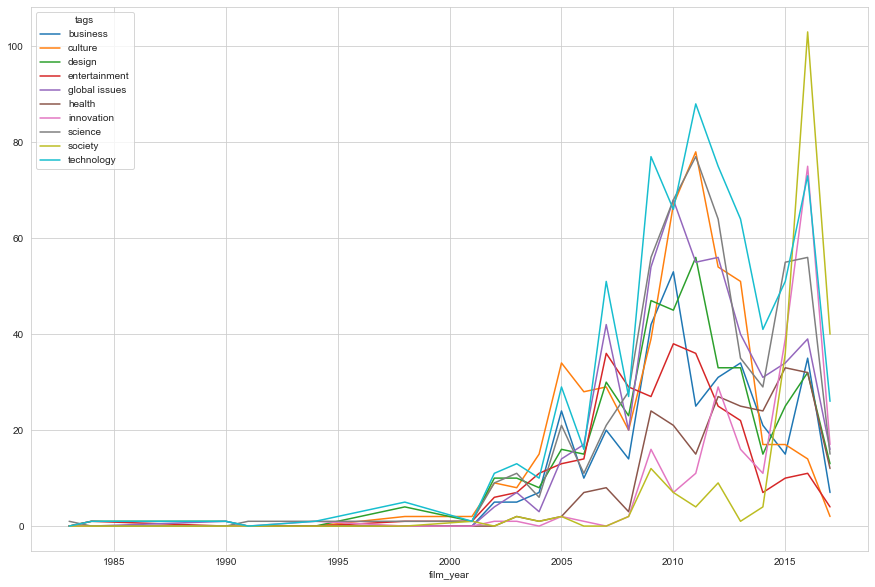

In [105]:
pd.crosstab(top_tags['film_year'], top_tags['tags']).plot(kind = 'line', stacked = False, figsize = (15,10))
plt.show()

TED Talks with the top tags really started to take off around 2001-2002, which is the same time talks started regularly being given.

Top tags by proportion of talks

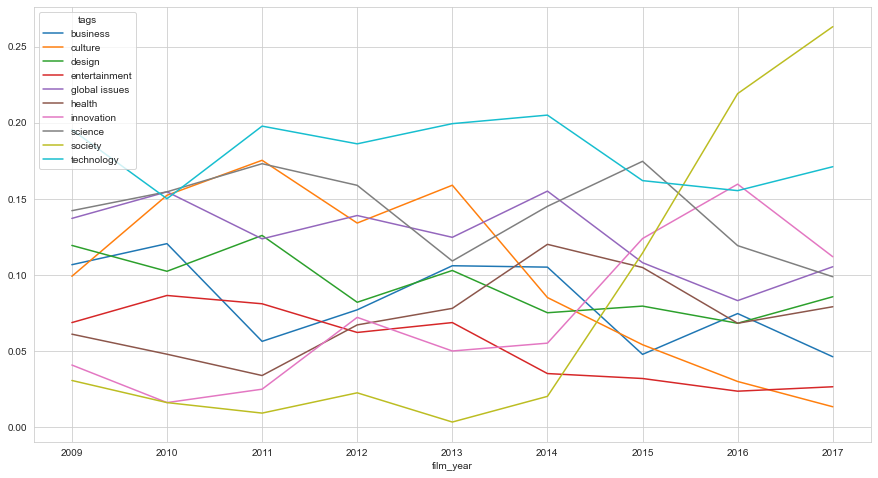

In [106]:
top_tags2001 = top_tags[top_tags['film_year'] > 2008]
top_tags_pct = pd.crosstab(top_tags2001['film_year'], top_tags2001['tags']).apply(lambda x: x/x.sum(), axis=1)
top_tags_pct.plot(kind = 'line', stacked = False, figsize = (15,8))
plt.show()

Starting in 2014, there has been a big spike in the proportion of talks with the tag "society"

## Import Libraries for Modeling

In [25]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
# from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# from sklearn.preprocessing import StandardScaler

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
# from sklearn.metrics import pairwise_distances

# import nltk

## Vectorize tags

In [109]:
ted_main_df['tags_no_ted'] = [[s for s in element if not 'ted' in s.lower() or s.lower() in ['united states','augmented reality']] for element in ted_main_df['tags']]
ted_main_df['tags_no_ted'].unique

<bound method Series.unique of 0       [children, creativity, culture, dance, educati...
1       [alternative energy, cars, climate change, cul...
2       [computers, entertainment, interface design, m...
3       [MacArthur grant, activism, business, cities, ...
4       [Africa, Asia, Google, demo, economics, global...
                              ...                        
2545    [United States, community, family, immigration...
2546    [Mars, South America, astrobiology, biology, e...
2547    [AI, ants, fish, future, innovation, insects, ...
2548    [Internet, United States, community, compassio...
2549    [cities, design, future, infrastructure, play,...
Name: tags_no_ted, Length: 2550, dtype: object>

In [112]:
ted_main_df['tags_string'] = ted_main_df['tags_no_ted'].apply(' '.join)
ted_main_df['tags_string']

0       children creativity culture dance education pa...
1       alternative energy cars climate change culture...
2       computers entertainment interface design media...
3       MacArthur grant activism business cities envir...
4       Africa Asia Google demo economics global devel...
                              ...                        
2545    United States community family immigration jou...
2546    Mars South America astrobiology biology explor...
2547    AI ants fish future innovation insects intelli...
2548    Internet United States community compassion po...
2549    cities design future infrastructure play publi...
Name: tags_string, Length: 2550, dtype: object

In [113]:
data = ted_main_df['tags_string']

tf_idf_vectorizor = TfidfVectorizer(
    stop_words = 'english', 
    max_features = 10000
)

tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [114]:
tf_idf_df = pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names())
tf_idf_df.shape #(2550, 426)
tf_idf_df.head(10)

3d  activism  addiction  adventure  advertising    africa  aging  \
0  0.0  0.000000        0.0        0.0          0.0  0.000000    0.0   
1  0.0  0.000000        0.0        0.0          0.0  0.000000    0.0   
2  0.0  0.000000        0.0        0.0          0.0  0.000000    0.0   
3  0.0  0.259895        0.0        0.0          0.0  0.000000    0.0   
4  0.0  0.000000        0.0        0.0          0.0  0.257265    0.0   
5  0.0  0.000000        0.0        0.0          0.0  0.000000    0.0   
6  0.0  0.000000        0.0        0.0          0.0  0.000000    0.0   
7  0.0  0.000000        0.0        0.0          0.0  0.000000    0.0   
8  0.0  0.000000        0.0        0.0          0.0  0.000000    0.0   
9  0.0  0.000000        0.0        0.0          0.0  0.000000    0.0   

   agriculture   ai  aids  aircraft  algorithm  alternative  alzheimer  \
0          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   
1          0.0  0.0   0.0       0.0        0.0     0.394482        0.0   
2          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   
3          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   
4          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   
5          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   
6          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   
7          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   
8          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   
9          0.0  0.0   0.0       0.0        0.0     0.000000        0.0   

   america  ancient  animals  animation  anthropocene  anthropology  ants  \
0      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
1      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
2      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
3      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
4      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
5      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
6      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
7      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
8      0.0      0.0      0.0        0.0           0.0           0.0   0.0   
9      0.0      0.0      0.0        0.0           0.0           0.0   0.0   

   apes  archaeology  architecture  art     asia  asteroid  astrobiology  \
0   0.0          0.0      0.000000  0.0  0.00000       0.0           0.0   
1   0.0          0.0      0.000000  0.0  0.00000       0.0           0.0   
2   0.0          0.0      0.000000  0.0  0.00000       0.0           0.0   
3   0.0          0.0      0.000000  0.0  0.00000       0.0           0.0   
4   0.0          0.0      0.000000  0.0  0.34142       0.0           0.0   
5   0.0          0.0      0.000000  0.0  0.00000       0.0           0.0   
6   0.0          0.0      0.000000  0.0  0.00000       0.0           0.0   
7   0.0          0.0      0.487325  0.0  0.00000       0.0           0.0   
8   0.0          0.0      0.000000  0.0  0.00000       0.0           0.0   
9   0.0          0.0      0.000000  0.0  0.00000       0.0           0.0   

   astronomy   atheism  augmented  autism  bacteria  balance  bang  beauty  \
0        0.0  0.000000        0.0     0.0       0.0      0.0   0.0     0.0   
1        0.0  0.000000        0.0     0.0       0.0      0.0   0.0     0.0   
2        0.0  0.000000        0.0     0.0       0.0      0.0   0.0     0.0   
3        0.0  0.000000        0.0     0.0       0.0      0.0   0.0     0.0   
4        0.0  0.000000        0.0     0.0       0.0      0.0   0.0     0.0   
5        0.0  0.000000        0.0     0.0       0.0      0.0   0.0     0.0   
6        0.0  0.457422        0.0     0.0       0.0      0.0   0.0     0.0   
7        0.0  0.000000        0.0     0.0       0.0      0.0   0.0     0.0   
8        

In [116]:
feature_list = ['tags_string'] #['duration','speaker_occupation','tags']
ted_main_df[feature_list]

tags_string
0     children creativity culture dance education pa...
1     alternative energy cars climate change culture...
2     computers entertainment interface design media...
3     MacArthur grant activism business cities envir...
4     Africa Asia Google demo economics global devel...
...                                                 ...
2545  United States community family immigration jou...
2546  Mars South America astrobiology biology explor...
2547  AI ants fish future innovation insects intelli...
2548  Internet United States community compassion po...
2549  cities design future infrastructure play publi...

[2550 rows x 1 columns]

## Create and fit KMeans model

In [117]:
kmeans = KMeans (
    init="random",
    n_clusters = 3,
    n_init = 50,
    max_iter = 300,
    random_state = 42
)

In [118]:
# Fit the model to the vectorized tags
kmeans.fit(tf_idf_array)

KMeans(init='random', n_clusters=3, n_init=50, random_state=42)

In [119]:
# Assign clusters
predictions = kmeans.predict(tf_idf_array)

## View clusters

In [120]:
#import wordcloud library to help visualize cluster contents
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Identify the top features in each cluster, by TF/IDF score

In [121]:
def get_top_n_features_by_cluster(tf_idf_array, prediction, n_feats):
    
    labels = np.unique(prediction)
    dfs = []
    
    for label in labels:
        
        ix_temp = np.where(prediction == label) # indices for each cluster
        x_means = np.mean(tf_idf_array[ix_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
        
    return dfs

dfs = get_top_n_features_by_cluster(tf_idf_array, predictions, 20)

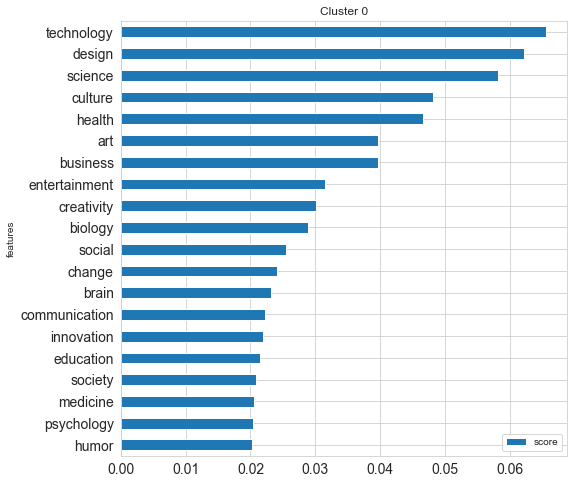

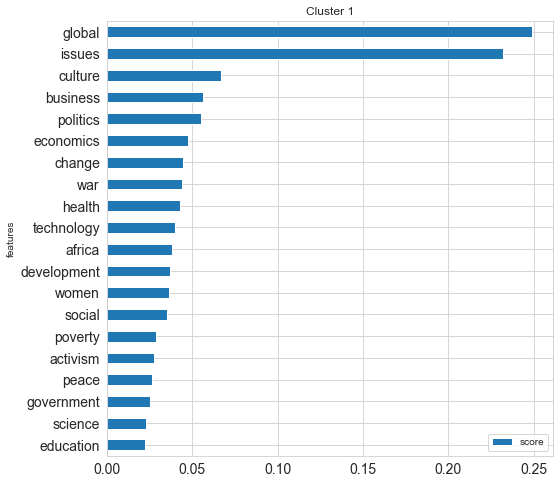

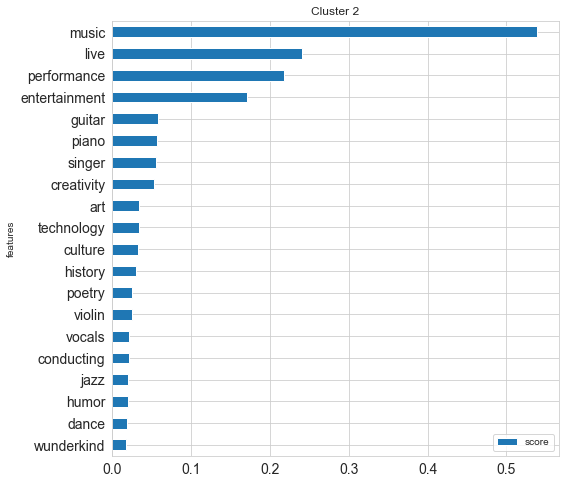

In [122]:
# Plot top features by score
for ix, df in enumerate(dfs):
    df.sort_values('score').plot(kind = 'barh', x = 'features', y = 'score', fontsize = 14, figsize = (8,8), title = ('Cluster ' + str(ix)))

Condense the information above into wordclouds

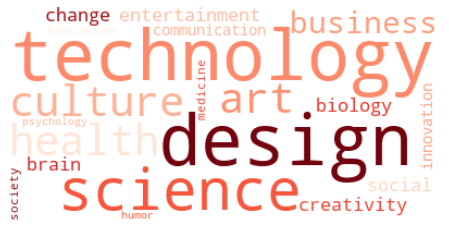

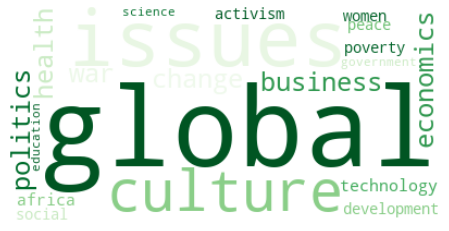

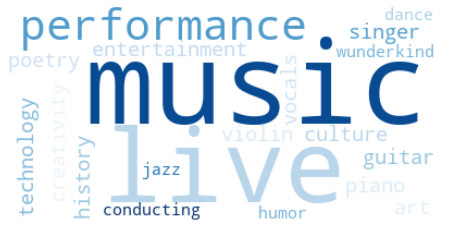

In [123]:
# Create stopword list:
stopwords = set(STOPWORDS)
cmaps = ['Reds','Greens','Blues']

for ix, df in enumerate(dfs):
    text = " ".join(desc for desc in df.features)

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words = 200, colormap = cmaps[ix]).generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.figure(figsize = (8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

At a glance, it looks like the 3 clusters selected by the algorithm can be summarized as:
- Science and technology
- Global and cultural socioeconomic issues
- Arts and entertainment

Use silhouette score to evaluate the model

In [124]:
sil_score = silhouette_score(tf_idf_array, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)

Silhouette Score: 0.027


Silhouette scores range from -1 to 1. Scores near +/- 1 indicate well-separated clusters. Scores near zero, like this one, mean the clusters have a lot of overlap.

## Explore other hyperparameters

Increase number of clusters to 4

In [125]:
def plot_barh_top_features(dfs):
    for ix, df in enumerate(dfs):
        df.sort_values('score').plot(
            kind = 'barh', 
            x = 'features', 
            y = 'score', 
            fontsize = 14, 
            figsize = (10,len(df) / 2), 
            title = ('Cluster ' + str(ix))
        )

def plot_wordcloud(dfs,bg_color):
    cmaps = ['Reds','Greens','Blues','Oranges','Purples']

    for ix, df in enumerate(dfs):
        text = " ".join(desc for desc in df.features)

        # Generate a word cloud image
        wordcloud = WordCloud(
            stopwords=stopwords, 
            background_color = bg_color, 
            max_words = 200, 
            colormap = cmaps[ix % 5]
        ).generate(text)

        # Display the generated image:
        # the matplotlib way:
        plt.figure(figsize = (8,4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

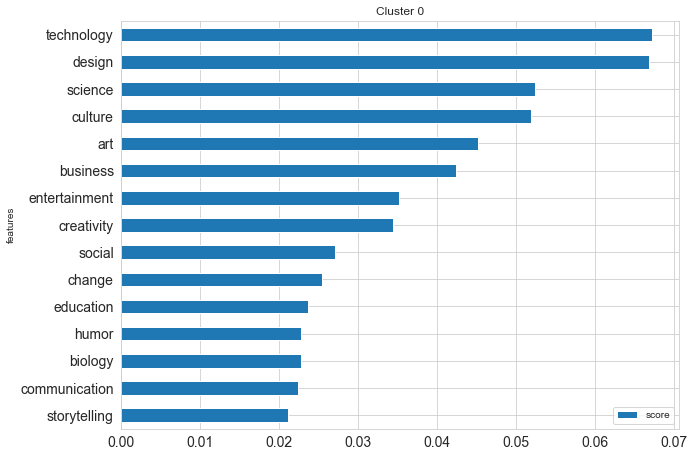

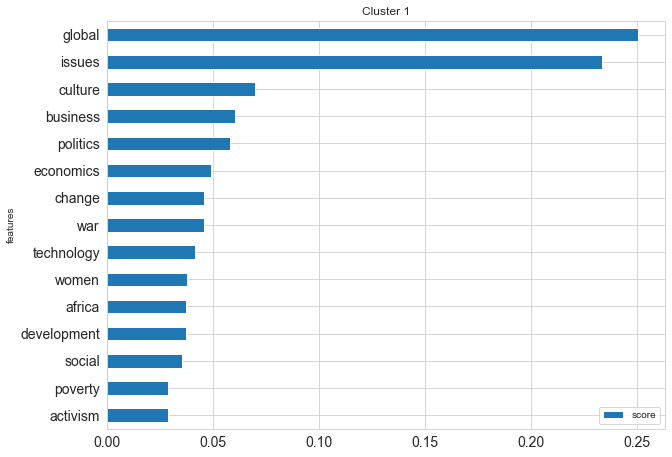

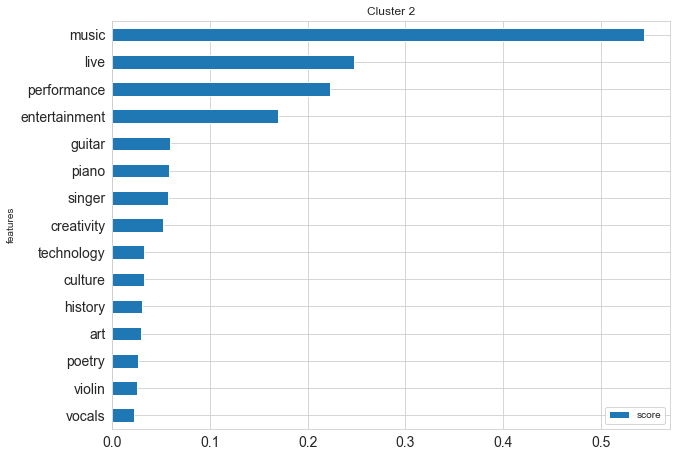

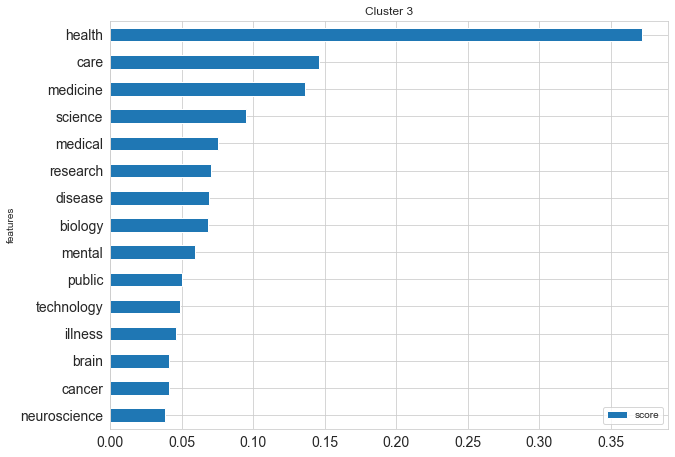

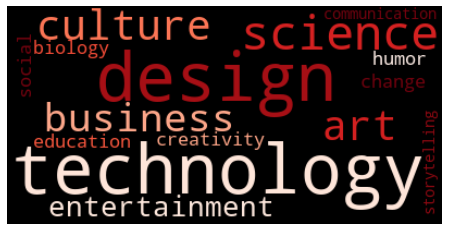

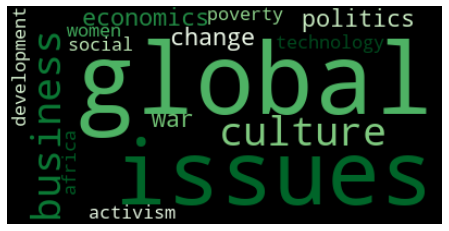

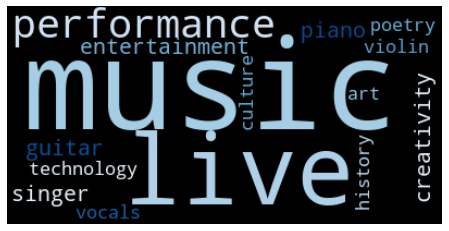

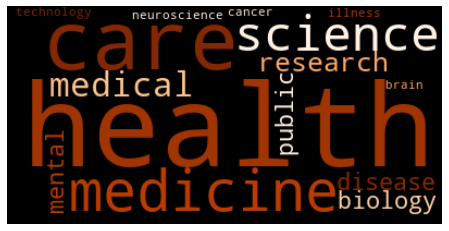

In [126]:
# Instantiate model
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=50,
    max_iter=300,
    random_state=42
)

# Fit to data and predict cluster assignments
kmeans.fit(tf_idf_array)
predictions = kmeans.predict(tf_idf_array)

# Identify and plot top features for each cluster
dfs = get_top_n_features_by_cluster(tf_idf_array, predictions, 15)

plot_barh_top_features(dfs)
plot_wordcloud(dfs,'black')

Adding one more cluster seems to have split the technology and science cluster into two:
- Medical sciences
- More general TED talk themes, like technology, education, communication, etc.

In [127]:
sil_score = silhouette_score(tf_idf_array, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)

Silhouette Score: 0.032


The score is still very close to zero, but adding a 4th cluster has improved it a little bit.

What about increasing the number of clusters to 12?

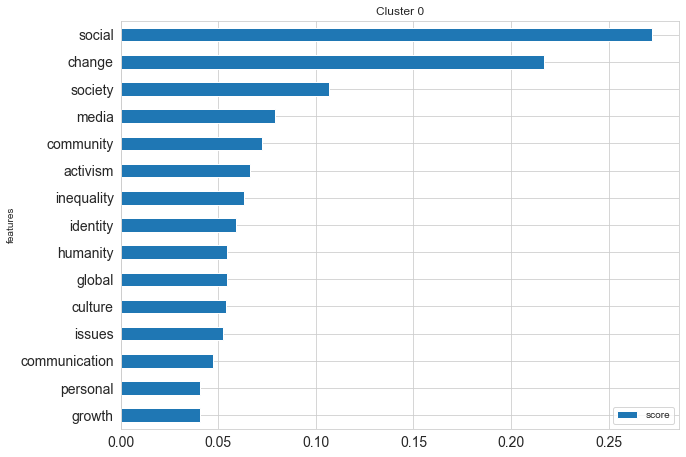

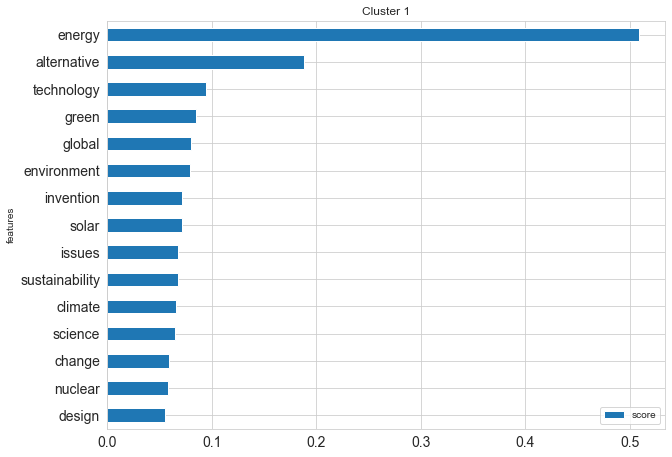

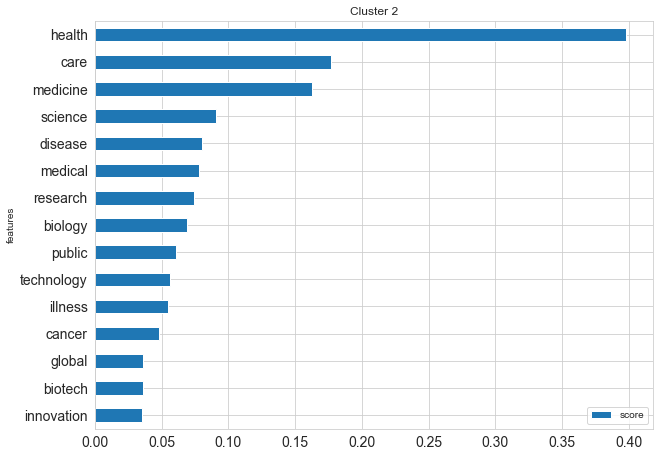

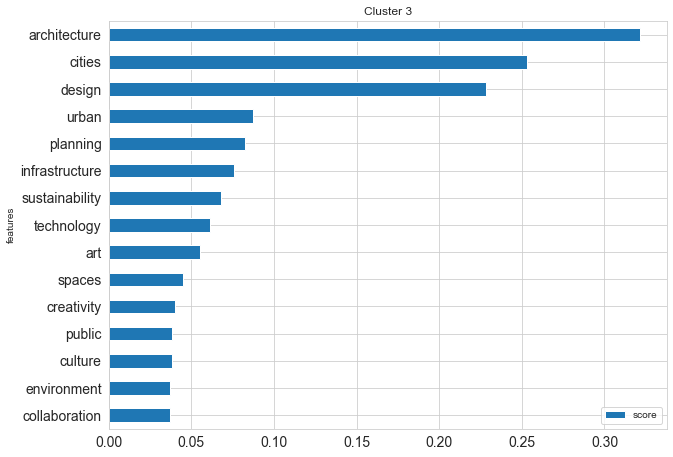

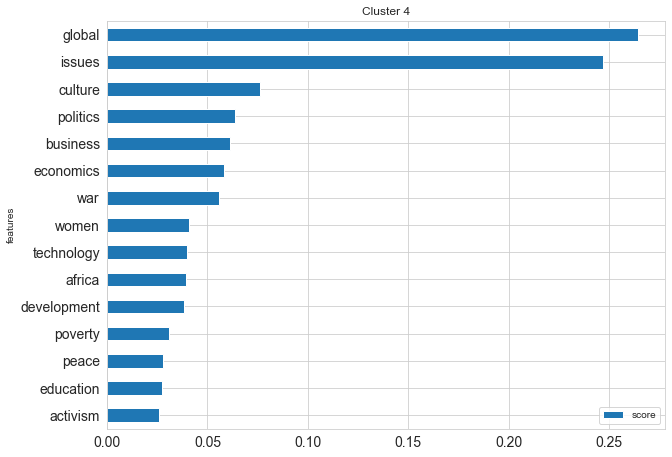

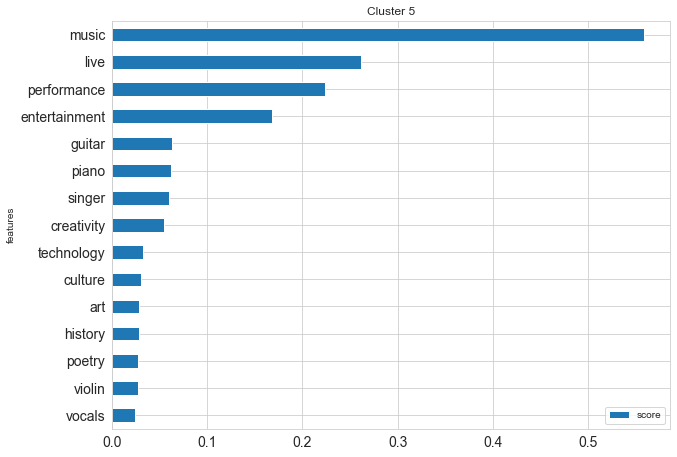

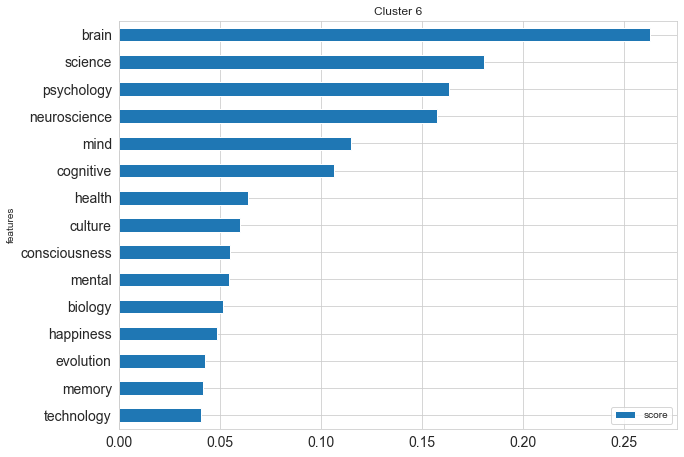

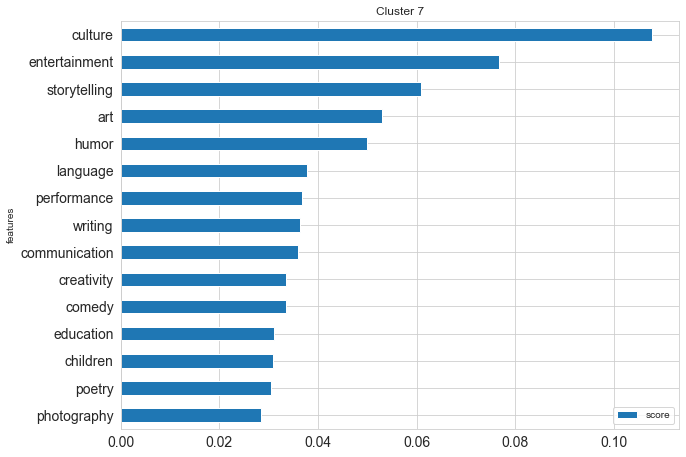

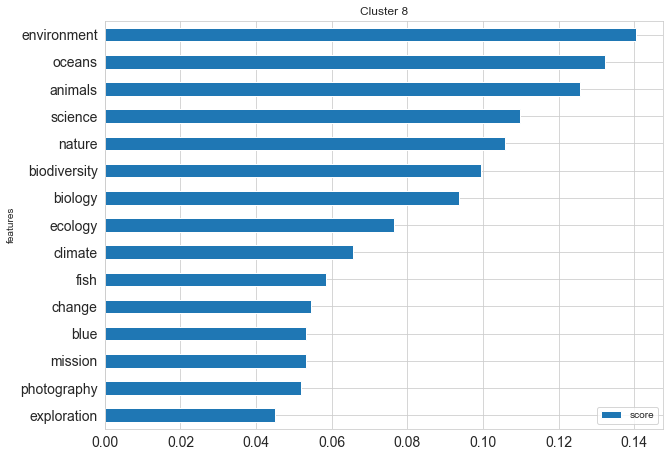

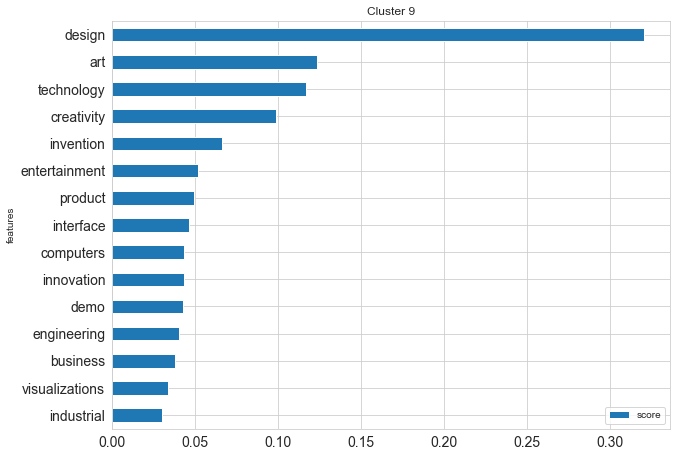

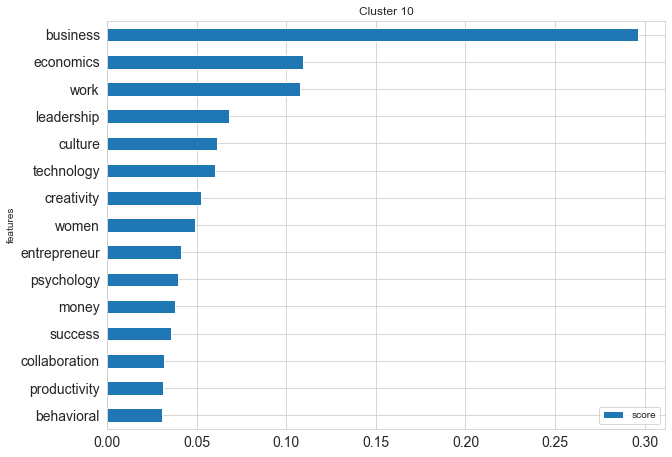

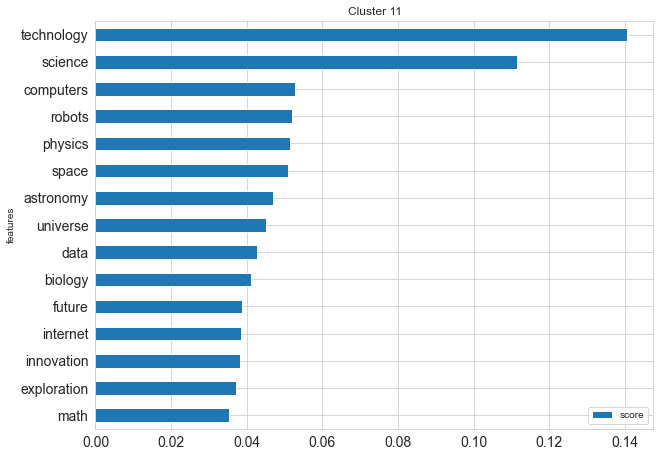

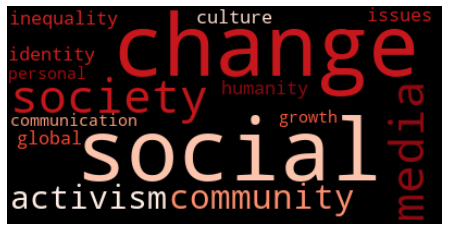

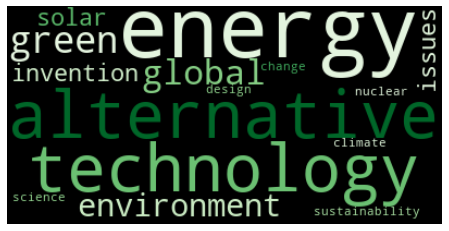

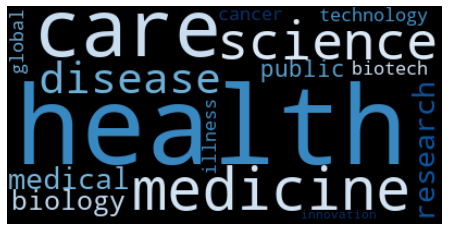

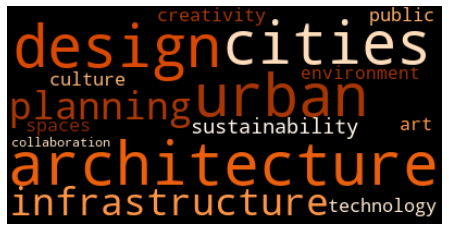

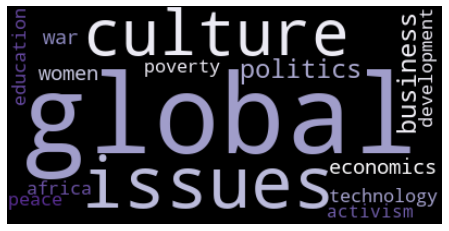

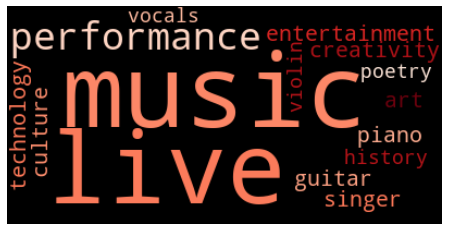

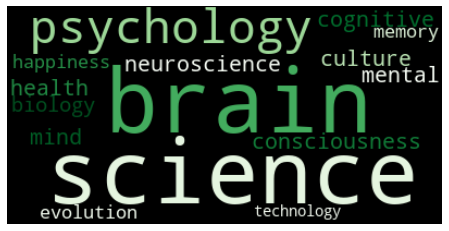

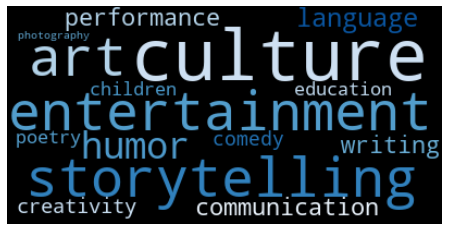

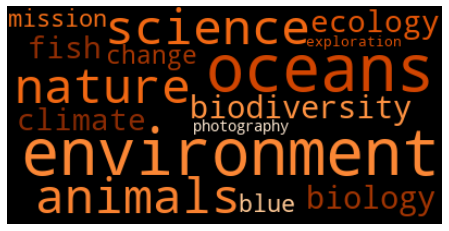

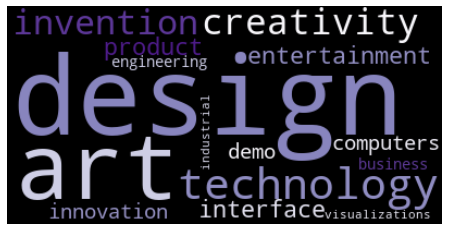

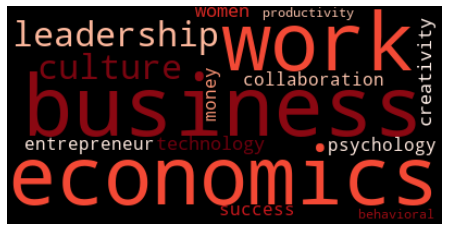

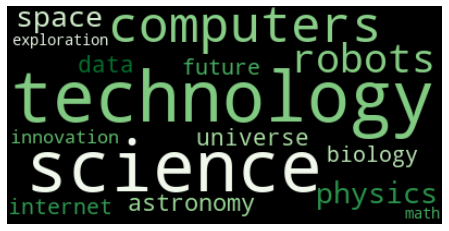

In [128]:
# Instantiate model
kmeans = KMeans(
    init="random",
    n_clusters=12,
    n_init=50,
    max_iter=300,
    random_state=42
)

# Fit to data and predict cluster assignments
kmeans.fit(tf_idf_array)
predictions = kmeans.predict(tf_idf_array)

# Identify and plot top features for each cluster
dfs = get_top_n_features_by_cluster(tf_idf_array, predictions, 15)

plot_barh_top_features(dfs)
plot_wordcloud(dfs,'black')

Adding more clusters has further specialized the topics in each cluster.

- General TED topics:
    - animals and nature
    - urban design
    - business and economics


- Global and Cultural Socioeconomic issues:
    - social activism
    - green energy and sustainability
    - global issues


- Arts and Entertainment:
    - music
    - language arts
    - art and design


- Science and Technology:
    - physical sciences and computers
    - health care/medicine
    - psychology and neuroscience

In [129]:
sil_score = silhouette_score(tf_idf_array, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)

Silhouette Score: 0.047


Increasing the number of clusters from 4 to 12 had another marginal improvement in silhouette score.

This seems logical - increasing the number of clusters should reduce the inter- and intra-cluster distance for each cluster. But there is still a lot of overlap, even with 12 clusters.

## Calculate ideal number of clusters

Build multiple KMeans models, increasing the number of clusters from 1 to 20.

Plot the scores for each model to identify the "elbow".

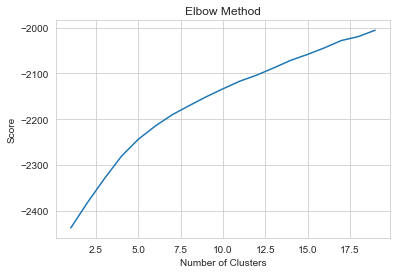

In [130]:
number_clusters = range(1, 20)

kmeans = [KMeans(n_clusters=i, n_init = 50, max_iter = 600, random_state = 42) for i in number_clusters]
kmeans

score = [kmeans[i].fit(tf_idf_array).score(tf_idf_array) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

No "elbow" is clearly identifiable from simple visual inspection.

It looks like it could be somewhere between 4 and 7, or possibly as far out as 17.

Let's try again using the kneed library's KneeLocator to calculate the "elbow" point.

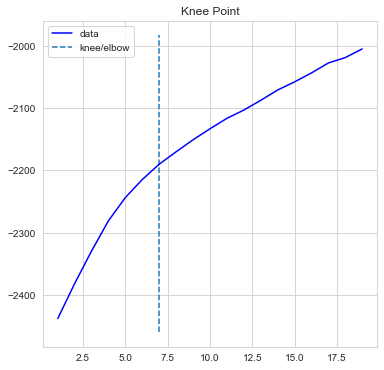

In [131]:
knee_loc = KneeLocator(number_clusters, score, S=1.0, curve='concave', direction='increasing')
knee_loc.plot_knee()

Based on this, the "elbow" appears to be at 7 clusters.

Re-run the model with 7 clusters.

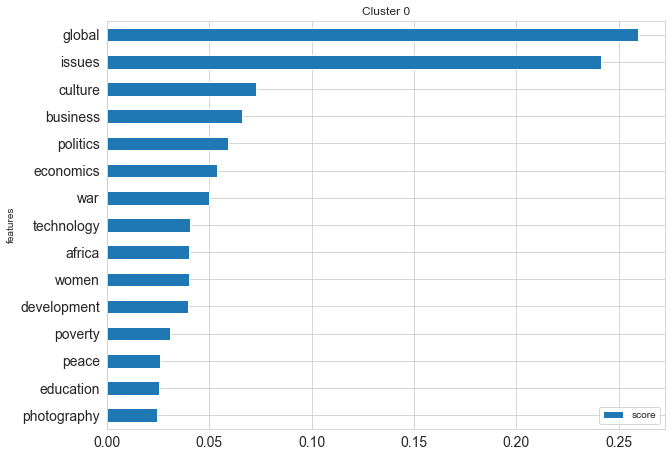

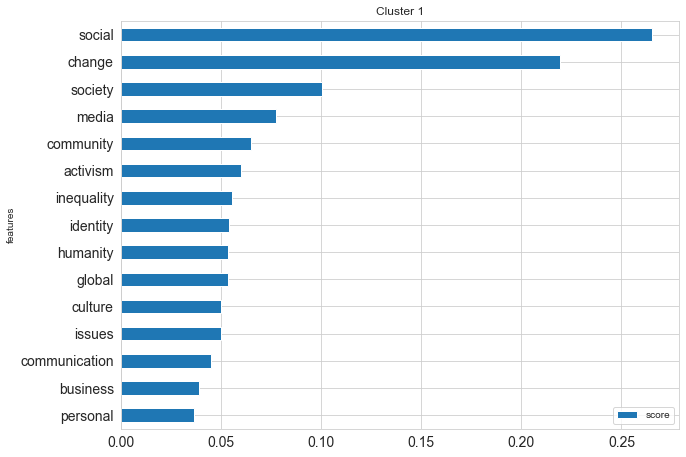

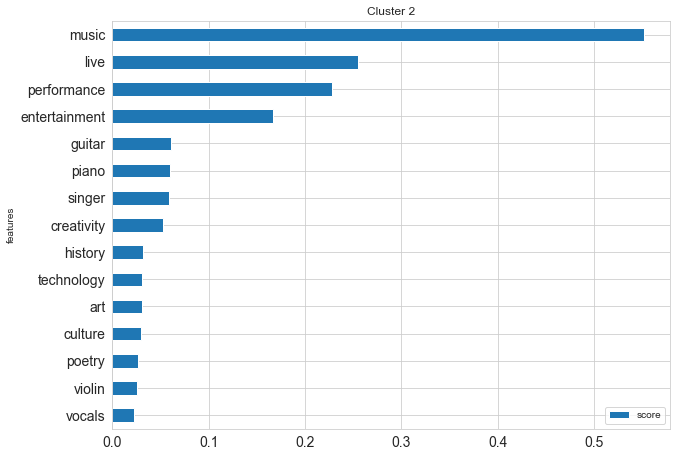

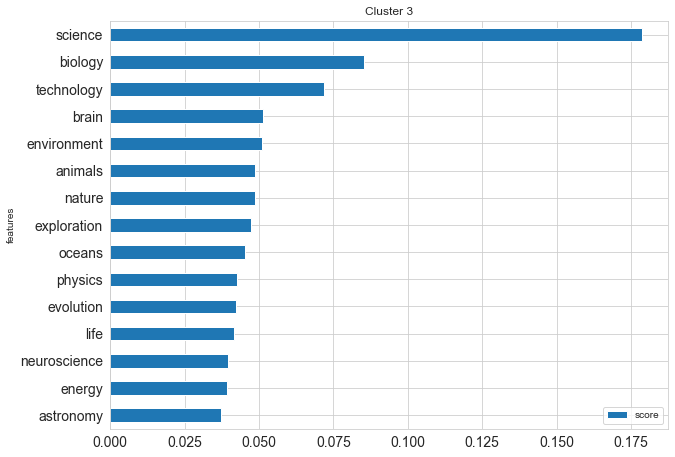

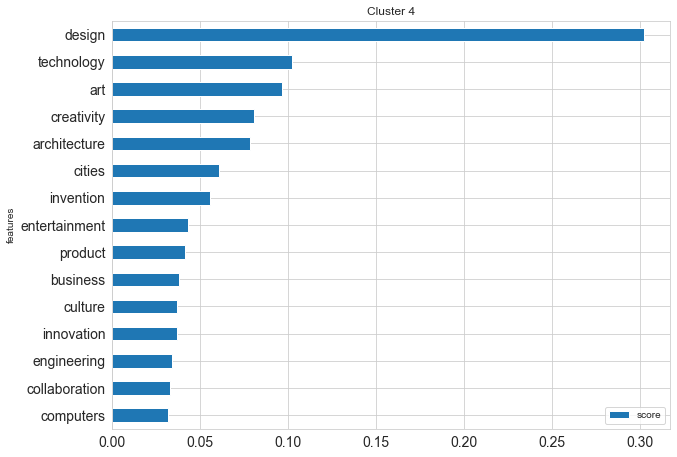

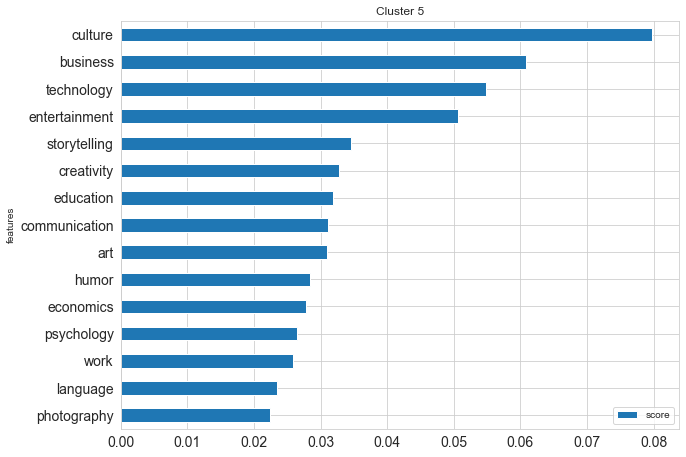

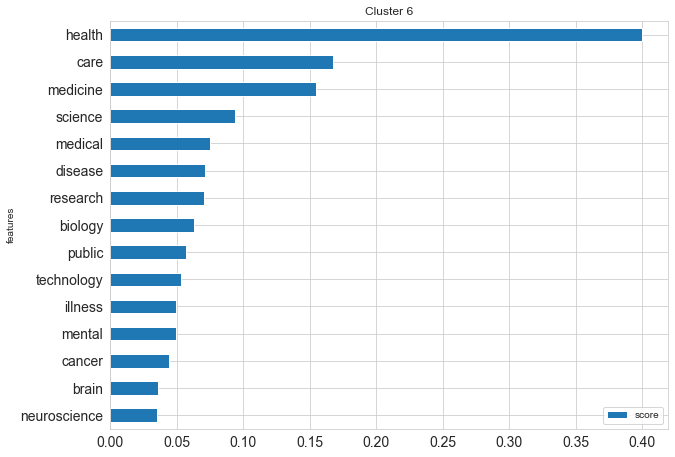

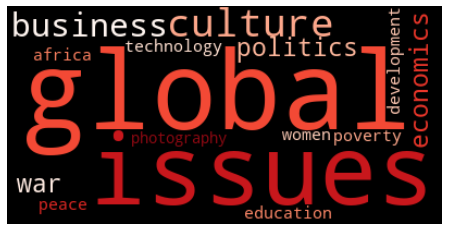

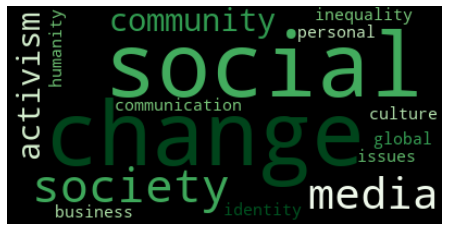

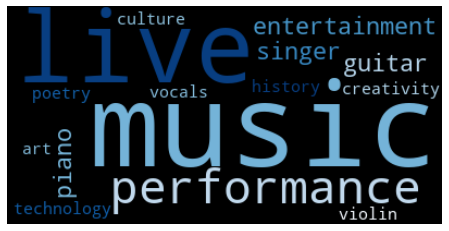

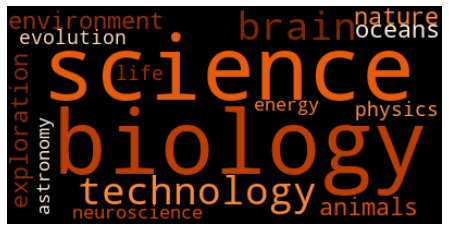

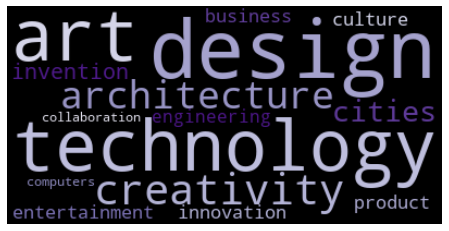

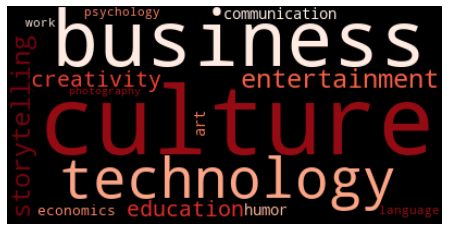

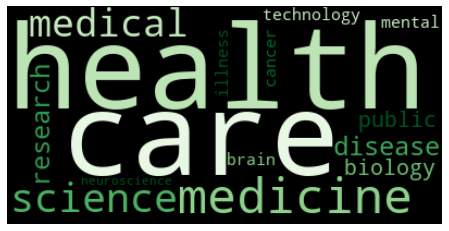

In [132]:
# Instantiate model
kmeans = KMeans(
    init="random",
    n_clusters=7,
    n_init=50,
    max_iter=600,
    random_state=42
)

# Fit to data and predict cluster assignments
kmeans.fit(tf_idf_array)
predictions = kmeans.predict(tf_idf_array)

# Identify and plot top features for each cluster
dfs = get_top_n_features_by_cluster(tf_idf_array, predictions, 15)

plot_barh_top_features(dfs)
plot_wordcloud(dfs,'black')

Based on the "elbow" method, the optimal set of clusters is:
- global/cultural socioeconomic issues
- social activism

- music and performance art

- invention and innovation (general TED topics)
- business and communication (general TED topics)

- health and medicine
- science and nature

## Score the model

Calculate the silhouette score

In [133]:
sil_score = silhouette_score(tf_idf_array, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)

Silhouette Score: 0.041


This score is only slightly lower than we had for 12 clusters. It seems to do almost as well at dividing up the talks, but uses 5 fewer clusters.